### Customer churn prediction

Customer retaining is one of the main problems that any buisiness has, the analysis of customer churn rate will help in taking better actions. This analysis of churn rate will allow us to understand better about customer satisfaction, weak points in buisiness, operational issues, customer preferences and expectations to reduce reasons for churn effectively.

The Customer-churn dataset contains the following information.

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Dataset Link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

This dataset contains 20 features out of which 17 are categorical and 3 are numerical. <br><br>
Categorical:
- CustomerID: Customer ID unique for each customer
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependent: Whether the customer has dependents or not (Yes, No)
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two years)
- PaperlessBilling: The Billing of the customer is paperbilling or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

Numerical:
- Tenure: Number of months the customer has stayed with the company
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer

Prediction feature:
- Churn: Whether the customer churned or not (Yes or No)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset into data object using pandas read_csv() method.

data = pd.read_csv('C:\\Users\\MEDHA TRUST\\Documents\\Govardhan\\ML\\Datasets\\churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are some misconceptions in data as 'SeniorCitizen' is marked as numerical which is actually categorical.<br>
and 'TotalCharges' marked as categorical which is actually numerical. We will solve that.

In [5]:
# as stated above, changing the datatypes of 'SeniorCitizen' and 'TotalCharges' features.

data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')
data['TotalCharges'] =  pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values in TotalCharges.

we can remove the 'customerId' as ot is unique for each customer.

In [8]:
data.drop(['customerID'], axis = 1, inplace = True)

In [9]:
## Filling the Null values of TotalCharges with the mean of the fetaure.

data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [10]:
## extract the columns names of both categorical and numerical datatypes
cat_columns = data.select_dtypes('object').columns
num_columns = data.select_dtypes(exclude = 'object').columns

In [11]:
num_columns, cat_columns

(Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
       dtype='object'))

In [12]:
data[num_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [13]:
for column in cat_columns:
    print(column, " : ", data[column].unique())

gender  :  ['Female' 'Male']
SeniorCitizen  :  [0 1]
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


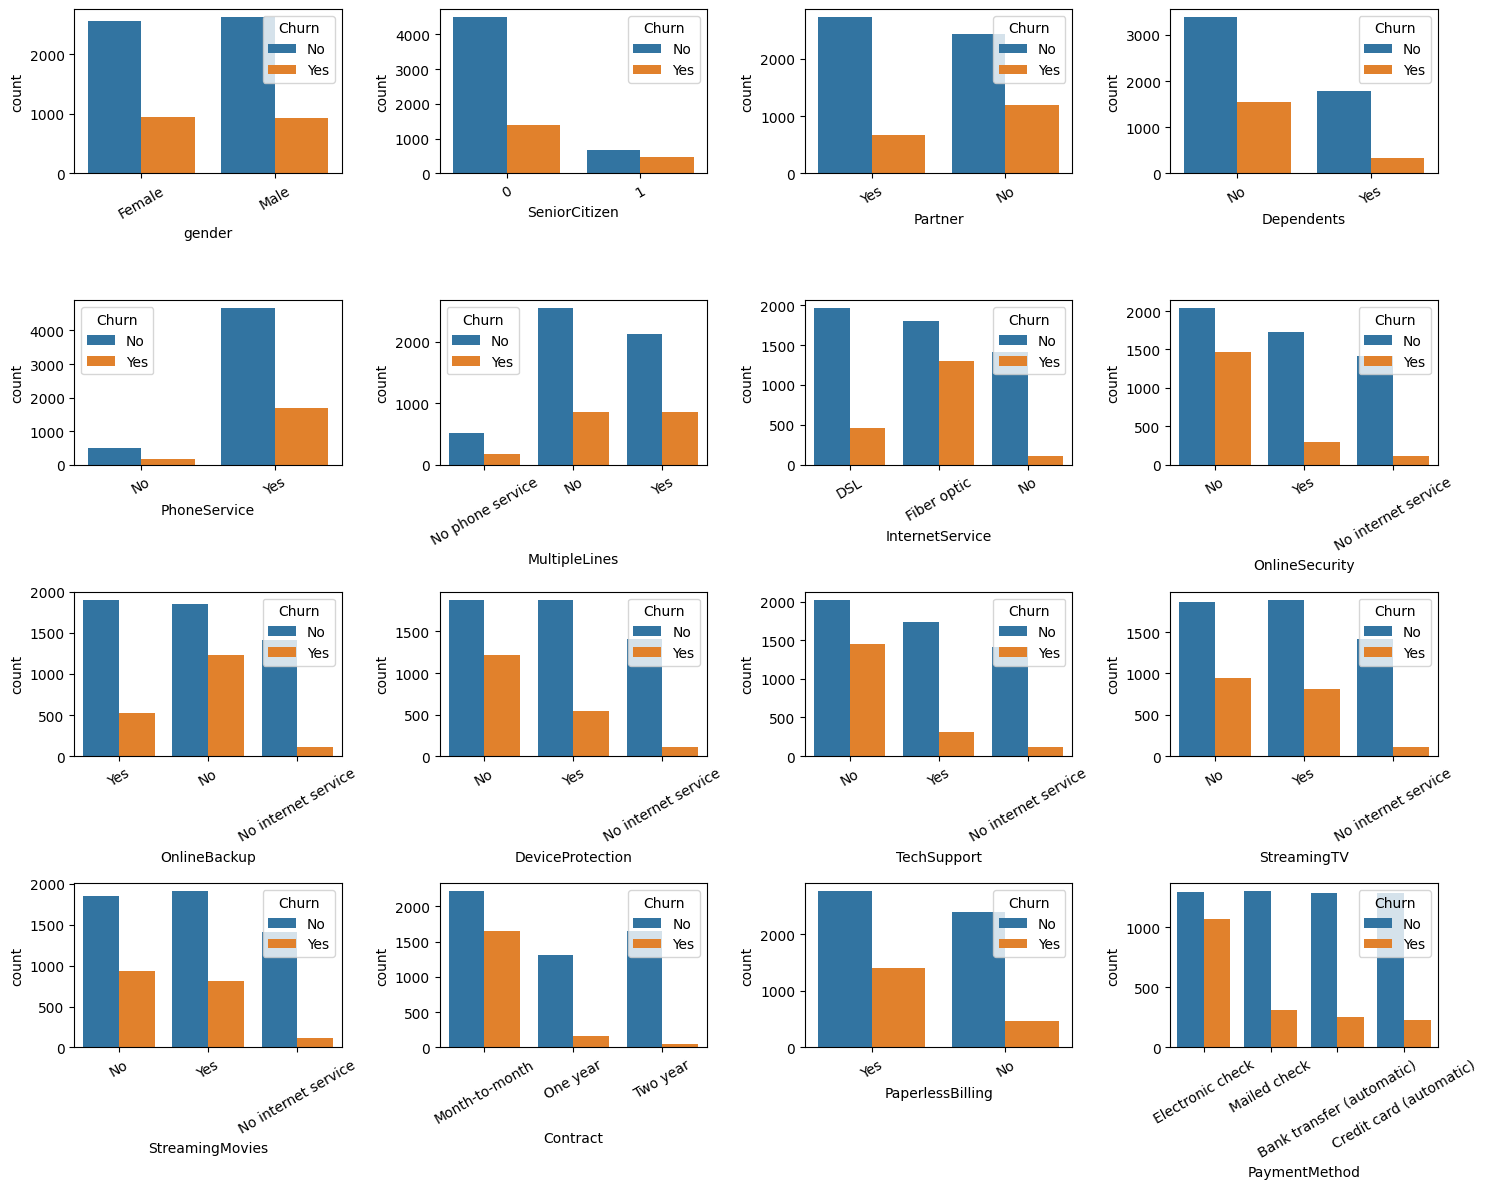

In [14]:
## plotting the countplot for categorical fetaures, wr.r.t churn.

fig, axs = plt.subplots(nrows=4, ncols=4, figsize = (15,12))
axs = axs.flatten()

for i, column in enumerate(cat_columns):
    if column != 'Churn':
        sns.countplot(data=data, x = column, hue = 'Churn', ax = axs[i])
        #axs[i].set_title(f'Count plot for {column}')
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()

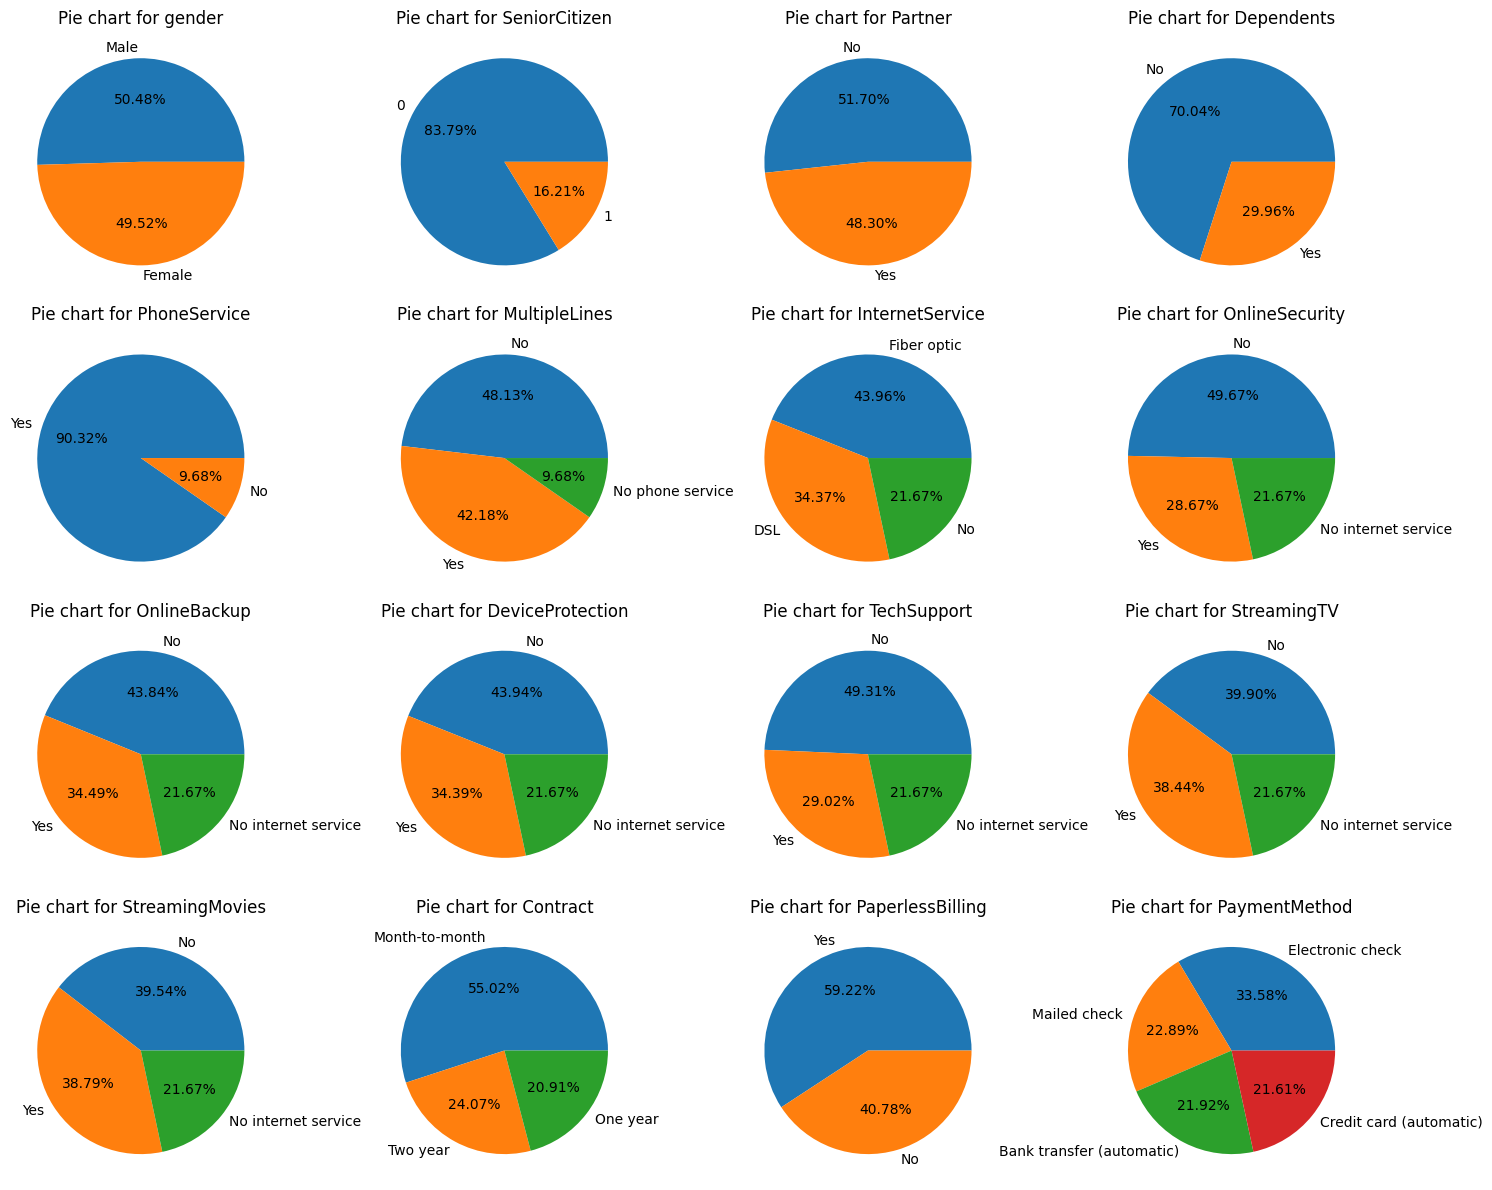

In [15]:
## plotting the piechart for count of catregorical feature classes.

fig, axs = plt.subplots(nrows=4, ncols=4, figsize = (15,12))
axs = axs.flatten()

for i, column in enumerate(cat_columns):
    if column != 'Churn':
        category_counts = data[column].value_counts()
        axs[i].pie(category_counts, labels=category_counts.index, autopct='%.2f%%')
        axs[i].set_title(f'Pie chart for {column}')

plt.tight_layout()
plt.show()

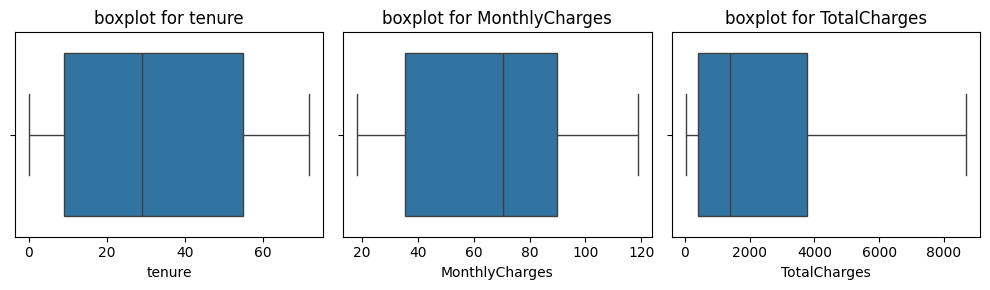

In [16]:
## plotting the boxplot for finding outliers in the numerical data

plt.figure(figsize=(10,3))
for i, column in enumerate(num_columns):
    plt.subplot(1, 3, i+1)
    fig  = sns.boxplot(data = data, x = column)
    fig.set_title(f'boxplot for {column}')

plt.tight_layout()
plt.show()

As of the boxplots plotted above we didnt have any outliers in all of the three numerical columns.

Below we try to find specific patterns between relatable features.

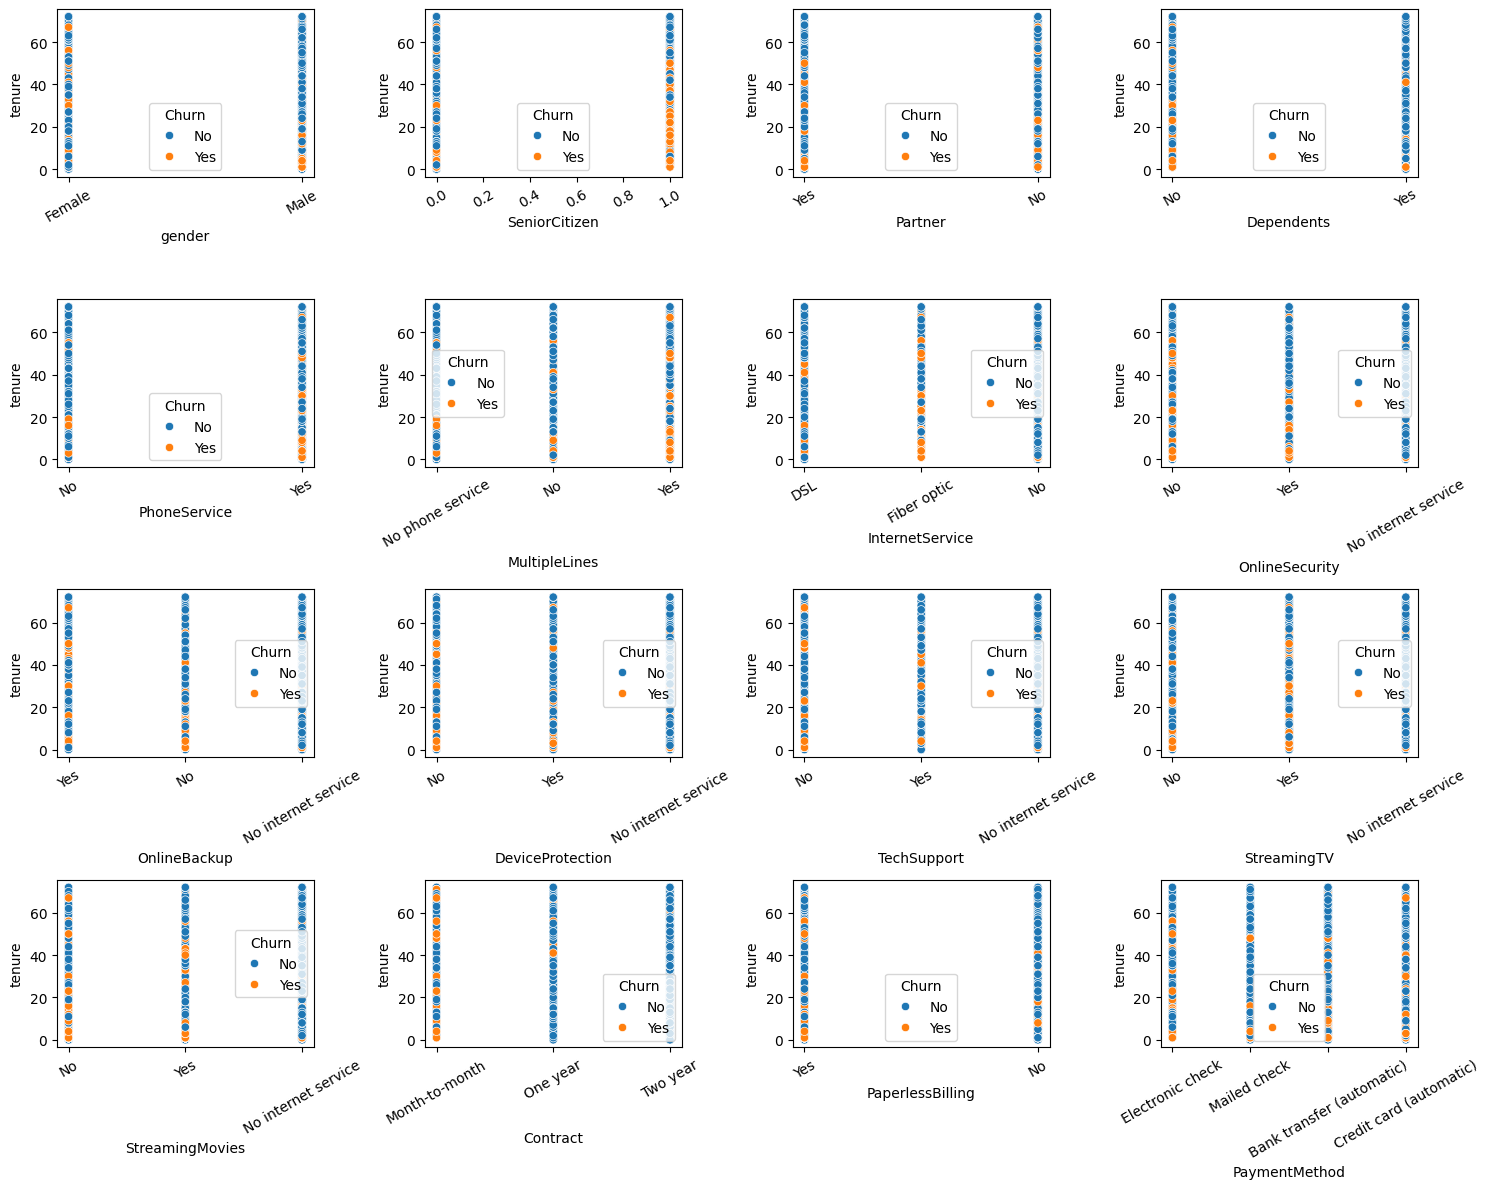

In [17]:
## plotting the scatterplot for categorical fetaures, w.r.t tenure.

fig, axs = plt.subplots(nrows=4, ncols=4, figsize = (15,12))
axs = axs.flatten()

for i, column in enumerate(cat_columns):
    if column != 'Churn':
        sns.scatterplot(data=data, x = column, hue = 'Churn',y = 'tenure', ax = axs[i])
        #axs[i].set_title(f'Count plot for {column}')
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()

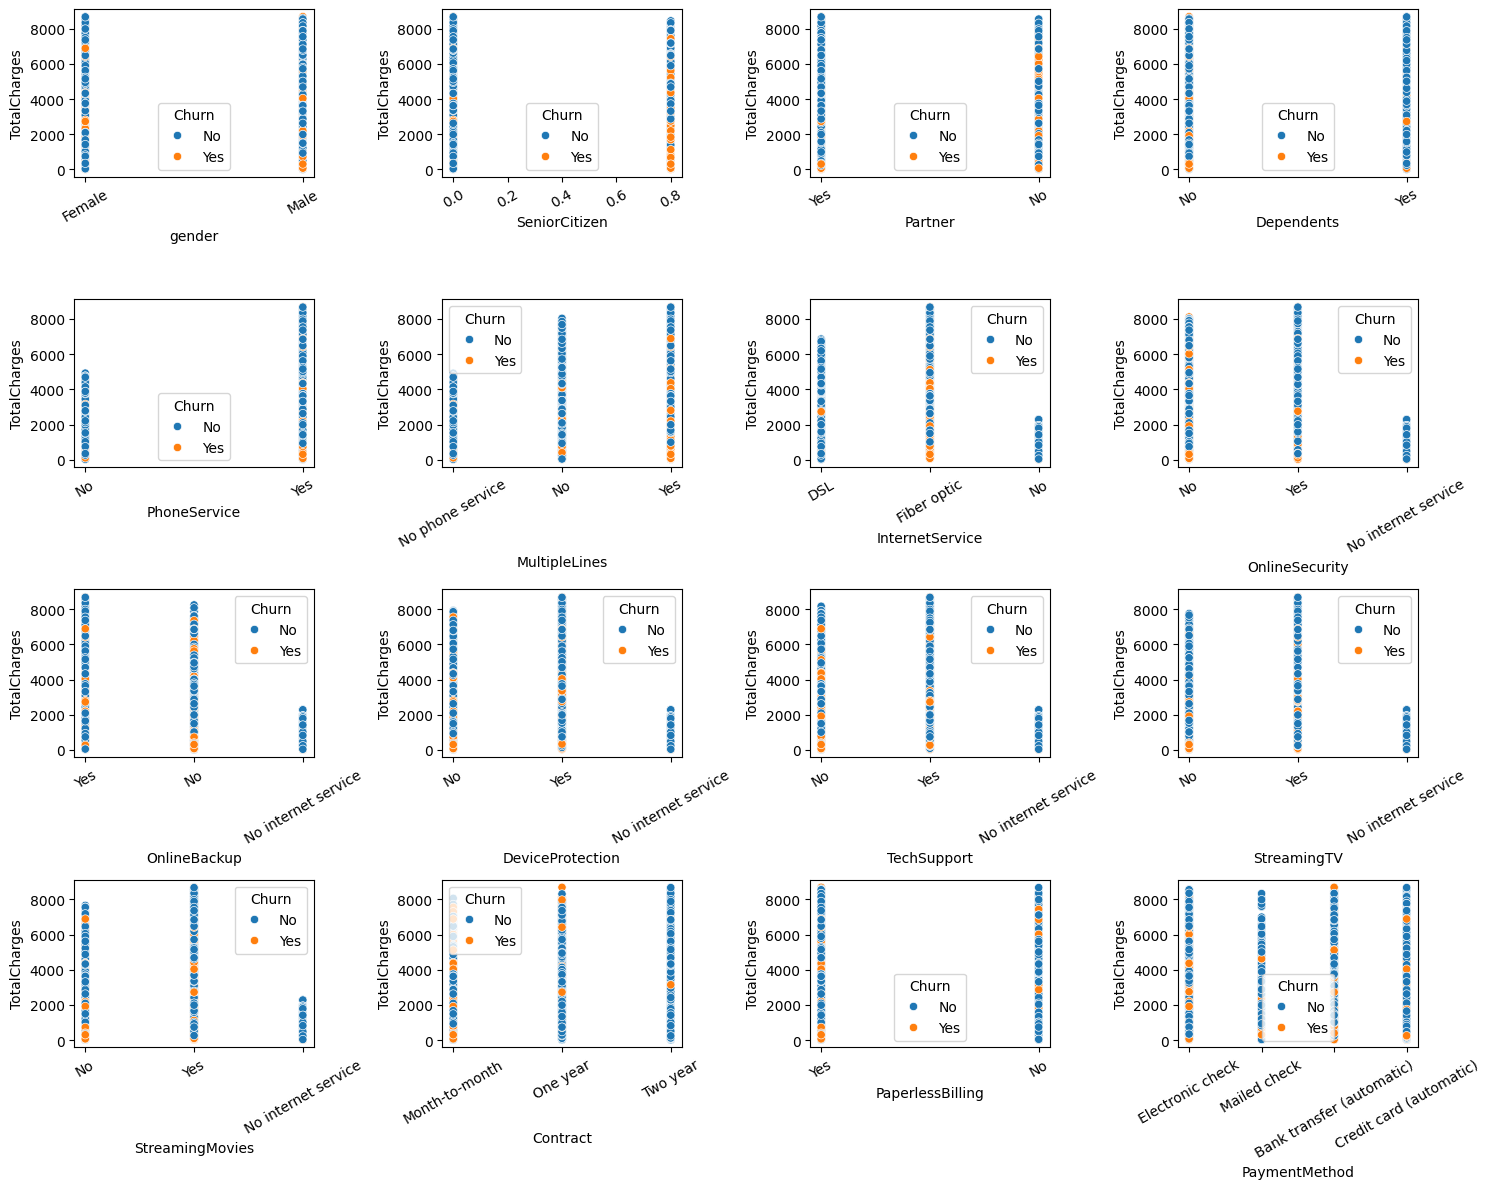

In [18]:
## plotting the scatterplot for categorical fetaures, w.r.t TotalCharges.

fig, axs = plt.subplots(nrows=4, ncols=4, figsize = (15,12))
axs = axs.flatten()

for i, column in enumerate(cat_columns):
    if column != 'Churn':
        sns.scatterplot(data=data, x = column, hue = 'Churn',y = 'TotalCharges', ax = axs[i])
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

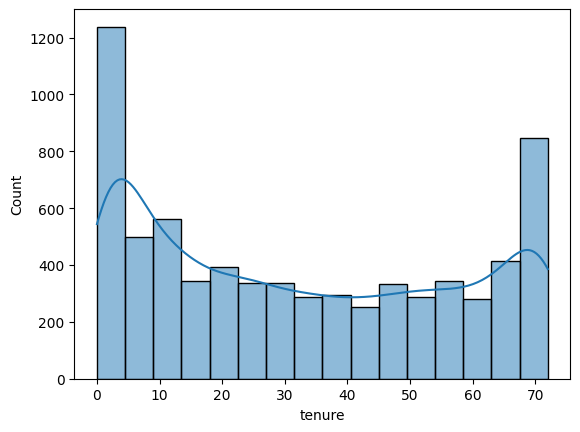

In [19]:
sns.histplot(data = data, x = 'tenure', kde = True)

#### Analysis of graphs
- Both Male and Female have almost equal percentage of churn.
- As the tenure increases Men are less likely to leave.
- SeniorCitizens are more likely to leave.
- Not having a Dependent are more likely to leave.
- Customers having contract of one-year and month-to-month are leaving as the Total cahrges increases.
- Customers having two-year contract are leaving very less.
- Customers not having TechSupport are more likely to leave.

 

In [20]:
data_new = data.copy()

In [21]:
data_new['Churn'] = data_new['Churn'].replace('Yes', 1)
data_new['Churn'] = data_new['Churn'].replace('No', 0)

In [22]:
# encode the categorical variables using Labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in cat_columns:
    data_new[col] = encoder.fit_transform(data_new[col])
    
data_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


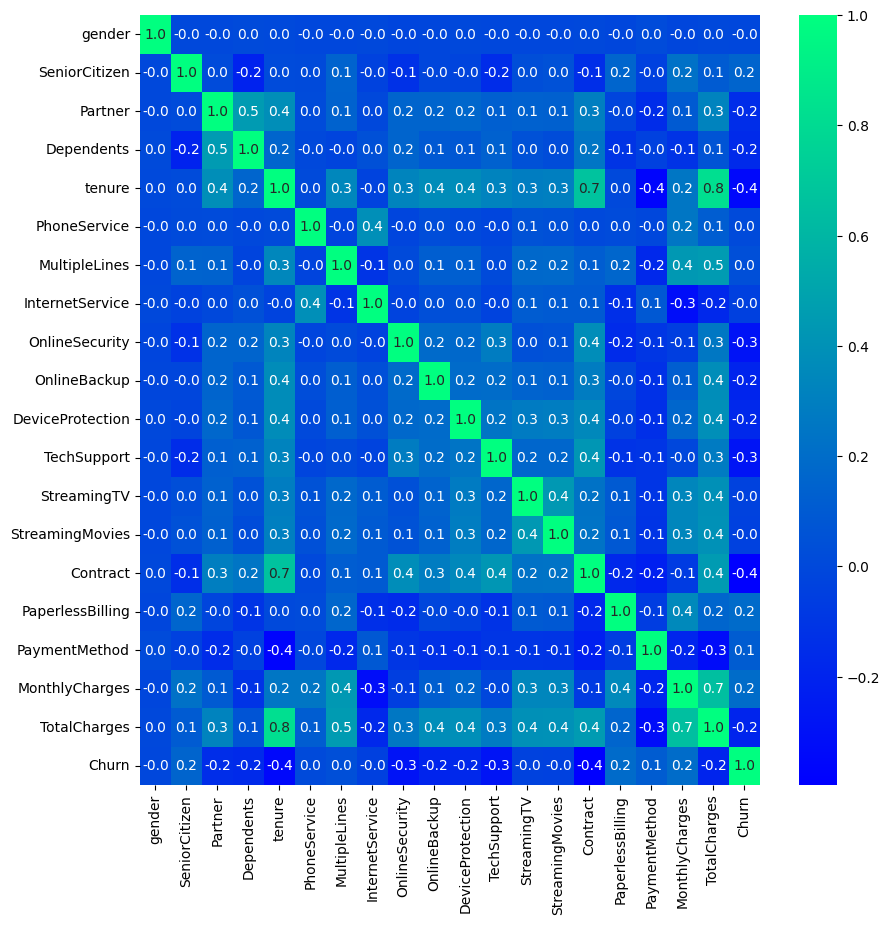

In [23]:
corr = data_new.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, cmap= "winter", annot = True, fmt = '.1f')
plt.show()

- TotalCharges has a string positive correlation with tenure.
- and also tenure has a string positive correlation with contract.

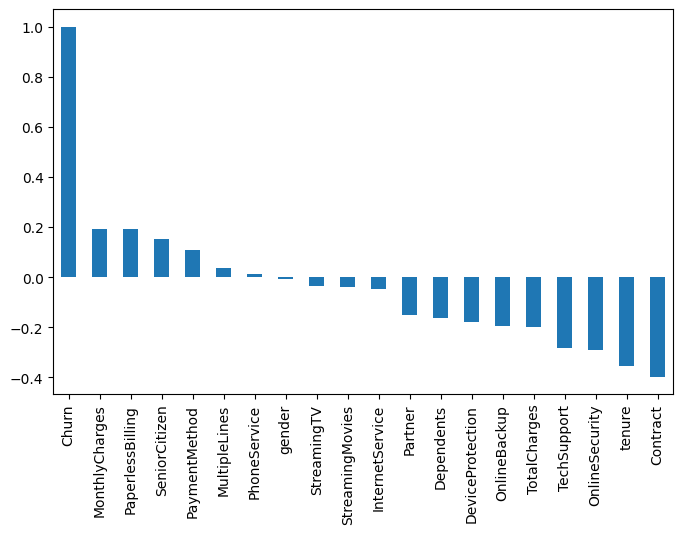

In [24]:
sorted_corr = corr['Churn'].sort_values(ascending=False)

plt.figure(figsize = (8,5))
sorted_corr.plot(kind = 'bar')
plt.show()

In [25]:

# Modelling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, roc_curve,  confusion_matrix, f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [35]:
# scale the data
scaler = MinMaxScaler()
data_new[num_columns] = scaler.fit_transform(data_new[num_columns])


# Assuming data_new contains your dataset and 'Churn' is the target variable
X = data_new.drop(['Churn'], axis=1)
y = data_new['Churn']


# Split the data into training and testing sets while maintaining the target variable's proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)


In [36]:
def Model(name, model):

    print("*******",name.upper(),"*******")
    
    final_model = model

    # Train the model on the entire training set
    final_model.fit(X_train, y_train)

    # Test the final model on the test dataset
    test_predictions = final_model.predict(X_test)

    # Evaluate the performance of the final model
    test_accuracy = accuracy_score(y_test, test_predictions)
    print("Test Accuracy:", test_accuracy)

    # Test the final model on the test dataset
    test_probabilities = final_model.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

    # Calculate precision and recall, f1score
    precision = precision_score(y_test, test_predictions)
    recall = recall_score(y_test, test_predictions)
    f1score = f1_score(y_test, test_predictions)

    print("test Precision:", precision)
    print("test Recall:", recall)

    # Plot the ROC AUC curve
    fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
    roc_auc = roc_auc_score(y_test, test_probabilities)
    
    plt.figure(figsize=(7,3))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    cm = confusion_matrix(y_test,test_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion matrix', y=1.1)
    plt.tight_layout()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return (test_accuracy, precision, recall, f1score)

    

******* LOGISTIC REGRESSION *******
Test Accuracy: 0.7984386089425124
test Precision: 0.6424050632911392
test Recall: 0.5427807486631016


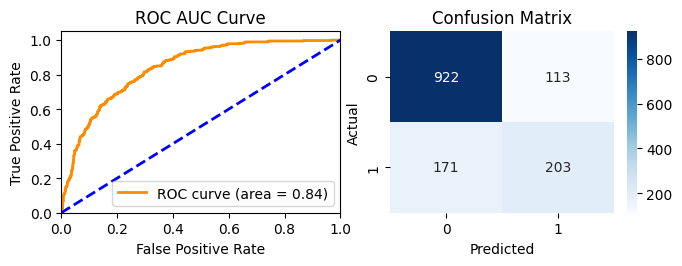

******* RANDOMFOREST CLASSIFIER *******
Test Accuracy: 0.7877927608232789
test Precision: 0.6271186440677966
test Recall: 0.4946524064171123


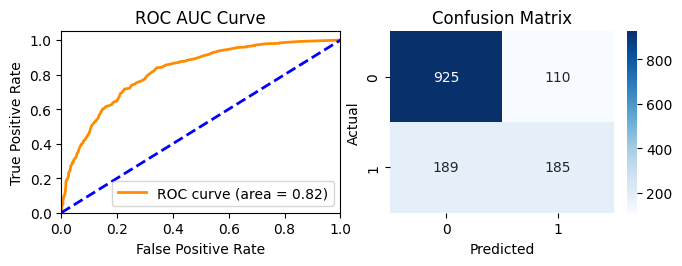

******* GRADIENTBOOSTINGCLASSIFIER *******
Test Accuracy: 0.8026969481902059
test Precision: 0.6690140845070423
test Recall: 0.5080213903743316


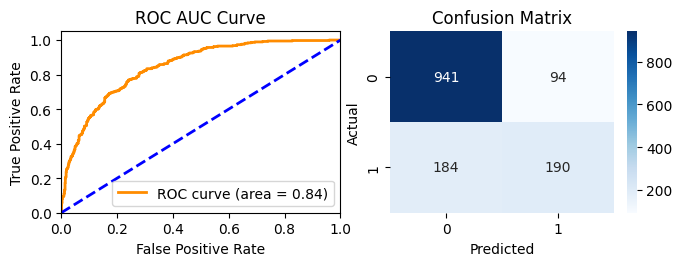

,test_accuracy,precision,recall,f1score
Logistic Regression,0.798439,0.642405,0.542781,0.588406
RandomForest Classifier,0.787793,0.627119,0.494652,0.553064
GradientBoostingClassifier,0.802697,0.669014,0.508021,0.577508


In [58]:
models = {
        "Logistic Regression" : LogisticRegression(), 
        "RandomForest Classifier" : RandomForestClassifier(),
        "GradientBoostingClassifier" : GradientBoostingClassifier()
         }

scores_dict = dict()
for name, model in models.items():
    scores = Model(name, model)
    scores_dict[name] = list(scores)

result = pd.DataFrame(scores_dict.values(), index=scores_dict.keys(), columns=['test_accuracy', 'precision', 'recall', 'f1score'])
result

0.8528428093645486
******* LOGISTIC PREDICTION *******
Test Accuracy: 0.6990773598296665
test Precision: 0.4621212121212121
test Recall: 0.8155080213903744


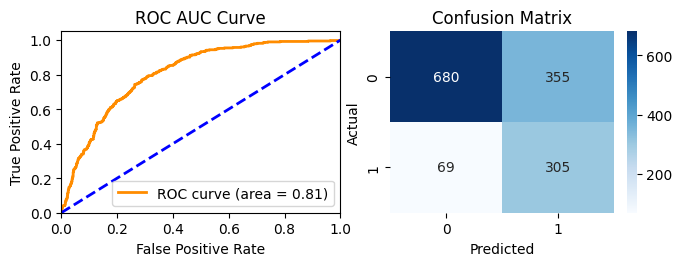

(0.6990773598296665,
 0.4621212121212121,
 0.8155080213903744,
 0.5899419729206964)

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced'],
    'C': [0.001, 0.01, 0.1, 1.0],  
    'max_iter': [100, 200, 300]
}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, refit = False, cv=5, scoring='recall')
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(grid.best_score_)

Model("Logistic prediction", LogisticRegression(**best_params))
# model.fit(X_train, y_train)

#print(confusion_matrix(y_test, pred))


In [60]:
print(best_params)

{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
ac = accuracy_score(pred, y_test)

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('C://Users//MEDHA TRUST//Documents//Govardhan//ML//github//CustomerChurn//CustomerChurn//artifacts//data_ingestion//data.csv')

# as stated above, changing the datatypes of 'SeniorCitizen' and 'TotalCharges' features.
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')
data['TotalCharges'] =  pd.to_numeric(data['TotalCharges'], errors='coerce')

# we can remove the 'customerId' as ot is unique for each customer.
data.drop(['customerID'], axis = 1, inplace = True)

# Filling the Null values of TotalCharges with the mean of the fetaure.
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

## extract the columns names of both categorical and numerical datatypes
cat_columns = data.select_dtypes('object').columns
num_columns = data.select_dtypes(exclude = 'object').columns

# Encode 'Churn' the target feature into a numeric
data['Churn'] = data['Churn'].replace('Yes', 1)
data['Churn'] = data['Churn'].replace('No', 0)



# encode the categorical variables using Labelencoder
encoder = LabelEncoder()

for col in cat_columns:
    data[col] = encoder.fit_transform(data[col])

# scale the data
scaler = MinMaxScaler()
data[num_columns] = scaler.fit_transform(data[num_columns])


# 'Churn' is the target variable
y = data['Churn']

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify = y)

In [31]:
train#, test.columns

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3738,1,0,0,0,0.486111,0,1,0,0,0,2,0,2,2,0,0,2,0.307960,0.194190,0
3151,1,0,1,1,0.208333,1,0,1,2,0,0,0,0,0,0,0,3,0.565672,0.130712,0
4860,1,0,1,1,0.180556,0,1,0,2,2,0,2,0,0,2,0,3,0.221891,0.065953,0
3867,0,0,1,0,0.361111,1,0,0,0,2,2,0,2,2,2,1,1,0.549751,0.217736,0
3810,1,0,1,1,0.013889,1,0,0,0,0,0,0,0,0,0,0,2,0.261692,0.002971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0,0,1,0,0.986111,1,2,1,0,2,2,2,2,2,2,0,2,0.905473,0.887249,0
6227,1,0,0,0,0.027778,1,0,0,0,0,0,0,0,0,0,0,0,0.276617,0.007102,1
4673,0,1,0,0,0.347222,1,2,1,2,2,0,0,2,2,0,1,3,0.841294,0.304800,1
2710,0,0,1,0,0.333333,1,0,2,1,1,1,1,1,1,1,0,1,0.021393,0.053543,0


In [32]:
test.Churn.value_counts(normalize = True), train.Churn.value_counts()

(Churn
 0    0.734564
 1    0.265436
 Name: proportion, dtype: float64,
 Churn
 0    4139
 1    1495
 Name: count, dtype: int64)

In [33]:
# Assuming data_new contains your dataset and 'Churn' is the target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

train = pd.read_csv('C://Users//MEDHA TRUST//Documents//Govardhan//ML//github//CustomerChurn//CustomerChurn//artifacts//data_transformation//train_data.csv')
test = pd.read_csv('C://Users//MEDHA TRUST//Documents//Govardhan//ML//github//CustomerChurn//CustomerChurn//artifacts//data_transformation//test_data.csv')


# Split the data into training and testing sets while maintaining the target variable's proportion
X_train = train.drop(['Churn'], axis=1)
X_test=  test.drop(['Churn'], axis=1)
y_train = train['Churn']
y_test=  test['Churn']


In [6]:
import joblib
from pathlib import Path
import pandas as pd

data = {
            'gender': 'Female', 
            'SeniorCitizen': 1,
            'Partner': 'Yes',
            'Dependents': 'Yes',
            'tenure': 35.0, 
            'PhoneService': 'Yes', 
            'MultipleLines': 'Yes',
            'InternetService': 'DSL', 
            'OnlineSecurity': 'Yes', 
            'OnlineBackup': 'Yes',
            'DeviceProtection': 'Yes',
            'TechSupport': 'Yes',
            'StreamingTV': 'Yes', 
            'StreamingMovies': 'Yes', 
            'Contract': 'Month-to-month',
            'PaperlessBilling': 'Yes', 
            'PaymentMethod': 'Electronic check',
            'MonthlyCharges': 54.0, 
            'TotalCharges': 3046.0}
#print(data)

data = pd.DataFrame(data = [data.values()], columns = data.keys())

preprocessor_object = joblib.load(Path('C:\\Users\\MEDHA TRUST\\Documents\\Govardhan\\MachineLearning\\github\\CustomerChurn\\CustomerChurn\\artifacts\\model\\preprocessor.joblib'))
data_preprocessed = preprocessor_object.transform(data)
# print(data_preprocessed)
# print(data)


transformed_feature_names = preprocessor_object.get_feature_names_out(input_features = data.columns)
final_preprocessed_data = pd.DataFrame(data_preprocessed, columns=transformed_feature_names)

pd.DataFrame(final_preprocessed_data)
# logger.info(f"{final_preprocessed_data}")
model = joblib.load(Path('C:\\Users\\MEDHA TRUST\\Documents\\Govardhan\\MachineLearning\\github\\CustomerChurn\\CustomerChurn\\artifacts\\model\\model.joblib'))
prediction = model.predict(final_preprocessed_data)

In [8]:
pd.DataFrame(final_preprocessed_data)
#data.keys()
#data.values()

print(prediction)


[0]


In [30]:
data.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract        PaperlessBilling  PaymentMethod     MonthlyCharges  TotalCharges
Female  No             Yes      Yes         35.0    Yes           Yes            DSL              Yes             Yes           Yes               Yes          Yes          Yes              Month-to-month  Yes               Electronic check  54.0            2004.0          1
Name: count, dtype: int64

In [1]:
import pandas as pd

In [22]:
df = pd.read_csv("C://Users//MEDHA TRUST//Documents//Govardhan//Datasets//churn.csv" )
# df = df.drop(['Churn'], axis = 1).head(20)
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [18]:
df.to_csv("C://Users//MEDHA TRUST//Desktop//data_d.csv", index=False)

In [21]:
df = pd.read_csv("C://Users//MEDHA TRUST//Desktop//data_d.csv", )
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95
